<a href="https://colab.research.google.com/github/aishananaraji/arbitrary/blob/main/Housing_Price_Forecasts_m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Datasets
df = pd.read_csv("/content/drive/MyDrive/train (4).csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Splicing

In [ ]:
df1 = df.loc[:,['GrLivArea', 'YearBuilt', 'SalePrice']]
df1.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [ ]:
df1.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [ ]:
  df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [ ]:
df1.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

In [ ]:
df1.corr()[['SalePrice']]

,SalePrice
GrLivArea,0.708624
YearBuilt,0.522897
SalePrice,1.000000


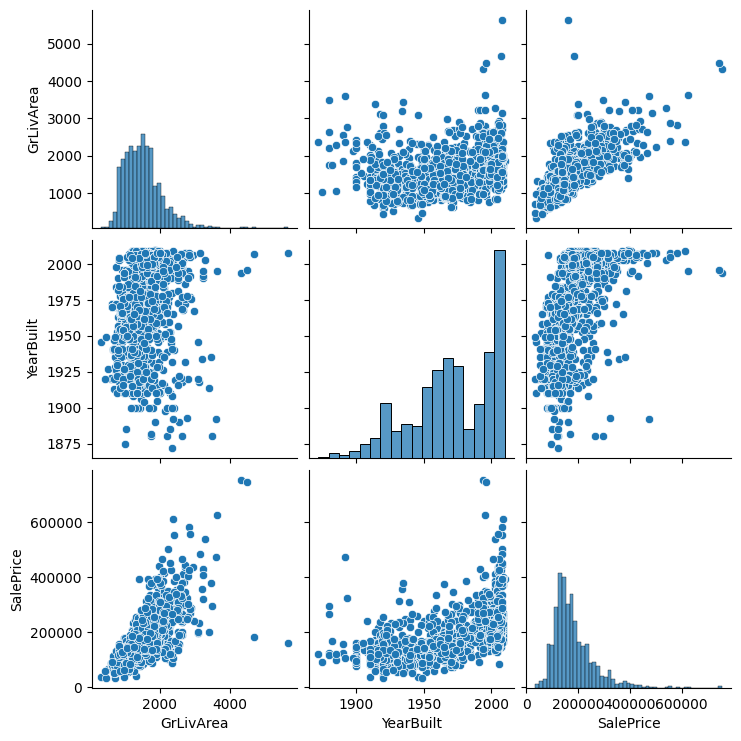

In [ ]:
sns.pairplot(df1)

In [ ]:
# Split the Data
X = df1.loc[:,['GrLivArea', 'YearBuilt']]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [ ]:
y = df1.loc[:, 'SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
y.ndim

1

# Problem 2

MSE: 2,495,554,898.668
R-squared of fit:  0.6746481399539467
Intercept: 181441.54195205486
Coefficients: [48312.57752432 31618.74747992]


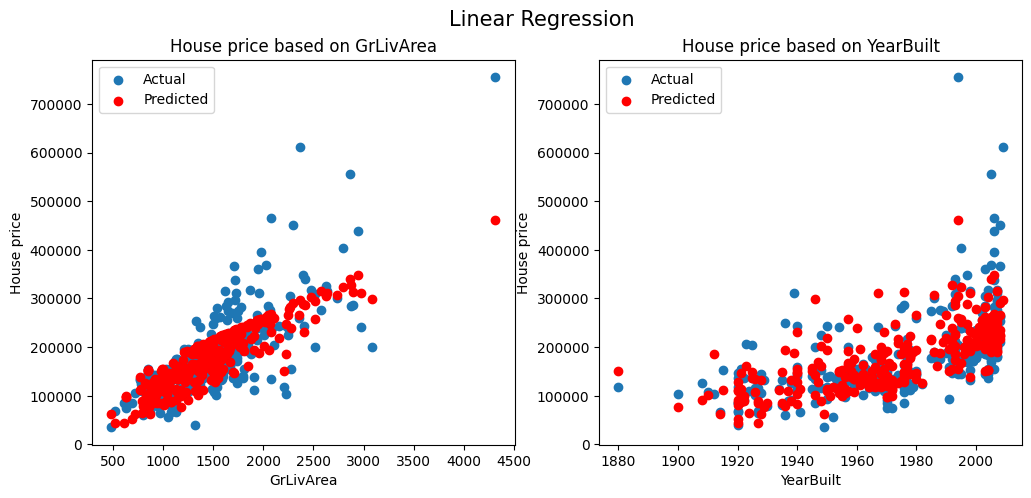

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/train (4).csv")

# Extracting Features and Target Variable
X = df[['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

# Preprocessing: Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)  # Corrected

# Training Linear Regression Model
lreg = LinearRegression()
lreg.fit(X_train_trans, y_train)

# Predictions
y_linear_pred = lreg.predict(X_test_trans)

# Evaluation
mse = mean_squared_error(y_test, y_linear_pred)
print("MSE: {:,.3f}".format(mse))

r_squared = r2_score(y_test, y_linear_pred)
print('R-squared of fit: ', r_squared)

print('Intercept:', lreg.intercept_)
print('Coefficients:', lreg.coef_)
# Visualization
def visualization(y_pred, title):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    ax1.scatter(X_test.loc[:, 'GrLivArea'], y_test, label='Actual')
    ax1.scatter(X_test.loc[:, 'GrLivArea'], y_pred, c='red', label='Predicted')
    ax1.set(title="House price based on GrLivArea", xlabel='GrLivArea', ylabel='House price')
    ax1.legend()

    ax2.scatter(X_test.loc[:, 'YearBuilt'], y_test, label='Actual')
    ax2.scatter(X_test.loc[:, 'YearBuilt'], y_pred, c='red', label='Predicted')
    ax2.set(title="House price based on YearBuilt", xlabel='YearBuilt', ylabel='House price')
    ax2.legend()

    fig.suptitle(title, fontsize=15)
    plt.show()

visualization(y_linear_pred, "Linear Regression")


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 2), (292, 2), (1168,), (292,))

In [ ]:
print('The intercept and slope coefficients that define the model:')
print(lreg.intercept_)
print(lreg.coef_)

The intercept and slope coefficients that define the model:
181441.54195205486
[48312.57752432 31618.74747992]


In [ ]:
X_test

,GrLivArea,YearBuilt
892,1068,1963
1105,2622,1994
413,1028,1927
522,1664,1947
1036,1620,2007
...,...,...
479,1131,1937
1361,1530,2005
802,1456,2005
651,1510,1940


# Problem 3

MSE: 2,495,554,898.668
R-squared of Linear Regression:  0.6746481399539466


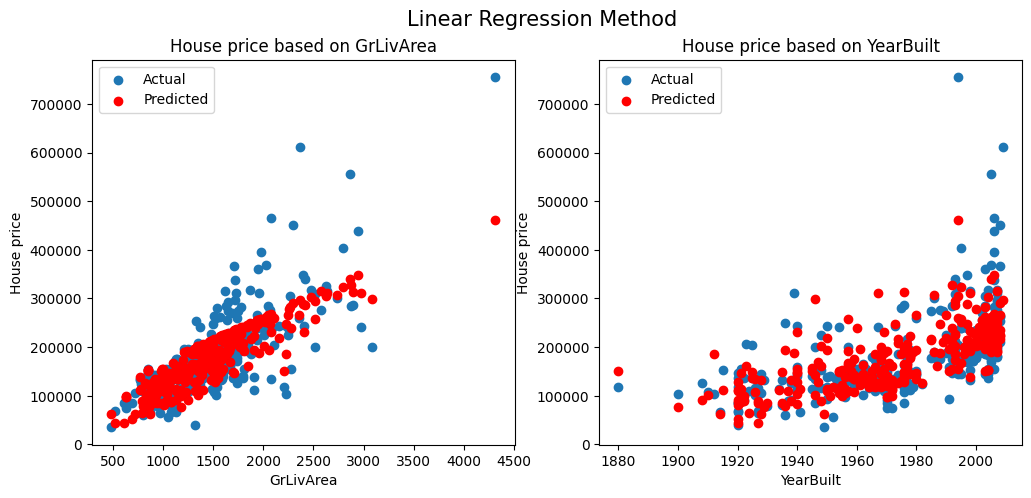

MSE: 7,844,111,028.864
R-squared of SVM:  -0.02265677064868643


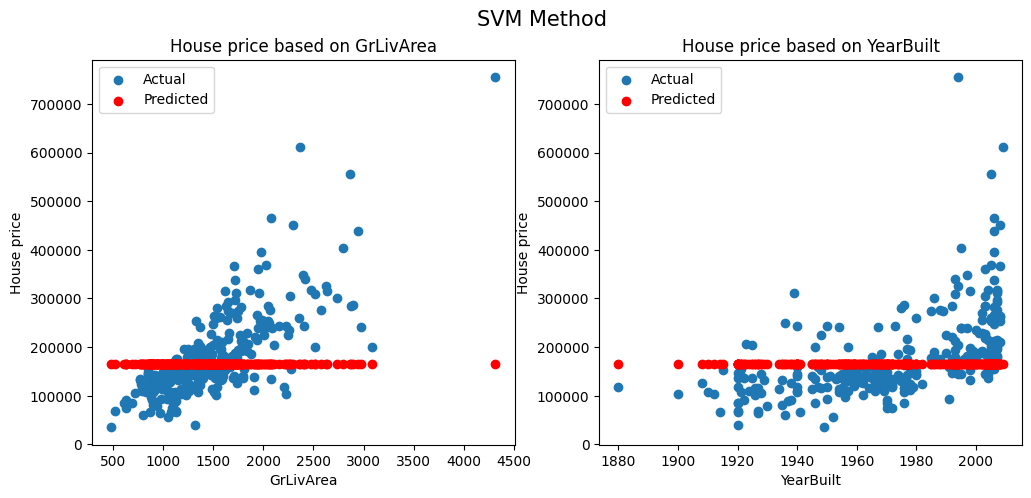

MSE: 1,558,123,595.122
R-squared of Random Forest:  0.7968634510404868


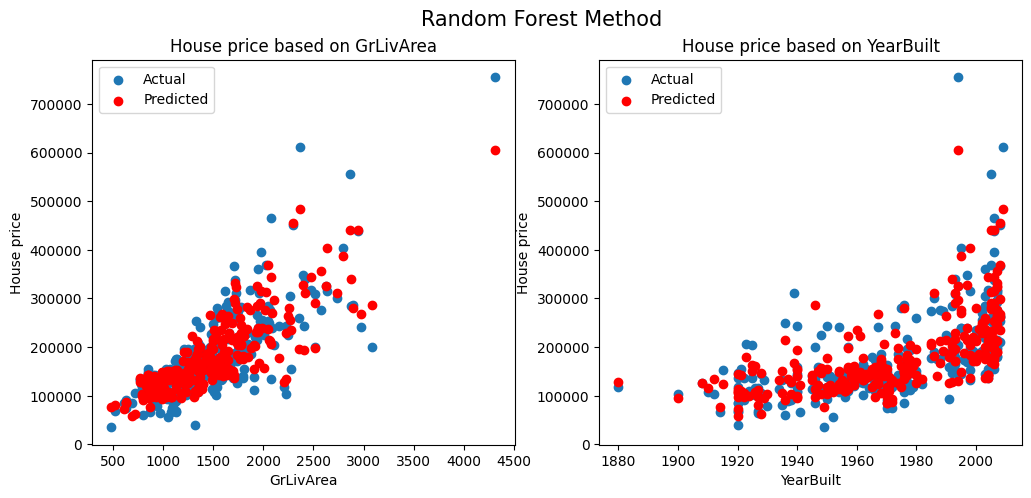

MSE: 2,096,489,717.846
R-squared of Decision Tree:  0.726675285872216


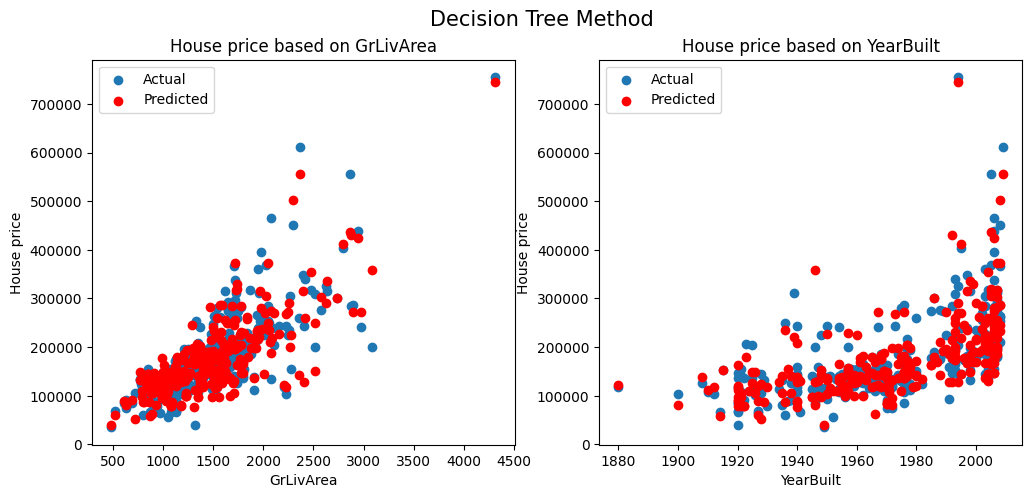

In [ ]:
# Linear Regression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_linear_pred = lreg.predict(X_test)

linear_mse = mean_squared_error(y_test, y_linear_pred)
print('MSE: {:,.3f}'.format(linear_mse))

print('R-squared of Linear Regression: ', r2_score(y_test, y_linear_pred))

# Visualization of Results
visualization(y_linear_pred, "Linear Regression Method")

# SVM
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
y_svr_pred = svr_reg.predict(X_test)

svr_mse = mean_squared_error(y_test, y_svr_pred)
print('MSE: {:,.3f}'.format(svr_mse))

print('R-squared of SVM: ', r2_score(y_test, y_svr_pred))

# Visualization of Results
visualization(y_svr_pred, "SVM Method")

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_rf_pred = rf_reg.predict(X_test)

rf_mse = mean_squared_error(y_test, y_rf_pred)
print('MSE: {:,.3f}'.format(rf_mse))

print('R-squared of Random Forest: ', r2_score(y_test, y_rf_pred))

# Visualization of Results
visualization(y_rf_pred, "Random Forest Method")

# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_dt_pred = dt_reg.predict(X_test)

dt_mse = mean_squared_error(y_test, y_dt_pred)
print('MSE: {:,.3f}'.format(dt_mse))

print('R-squared of Decision Tree: ', r2_score(y_test, y_dt_pred))

# Visualization of Results
visualization(y_dt_pred, "Decision Tree Method")


# Problem 4

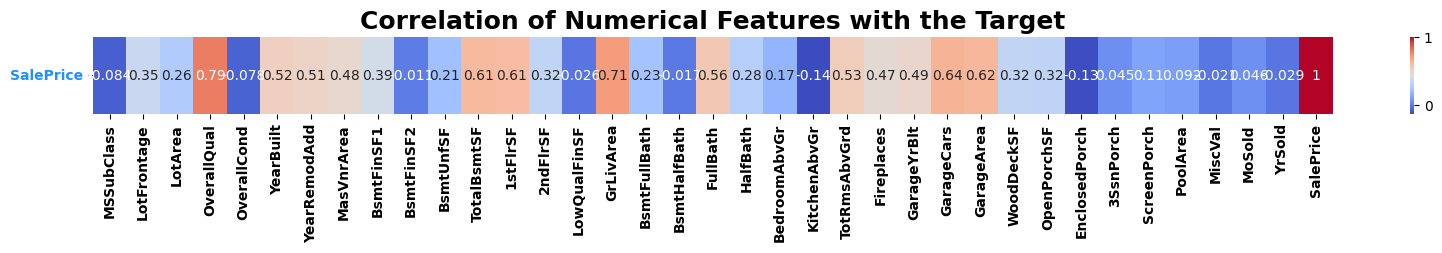

In [ ]:
plt.figure(figsize=(20, 1))
sns.heatmap(df.drop("Id", axis=1).corr().sort_values(by=['SalePrice'], ascending = False).head(1), cmap='coolwarm', annot=True)

plt.title('Correlation of Numerical Features with the Target', weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show

In [ ]:
train = df.loc[:,['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,7,2003,2003,856,856,1710,2,3,1,8,0,548,61,0,0,0,0,2,2008,208500
1,6,1976,1976,1262,1262,1262,2,3,1,6,1,460,0,0,0,0,0,5,2007,181500
2,7,2001,2002,920,920,1786,2,3,1,6,1,608,42,0,0,0,0,9,2008,223500
3,7,1915,1970,756,961,1717,1,3,1,7,1,642,35,272,0,0,0,2,2006,140000
4,8,2000,2000,1145,1145,2198,2,4,1,9,1,836,84,0,0,0,0,12,2008,250000


In [ ]:
train.isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageArea       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [ ]:
train.corr()['SalePrice'].sort_values(ascending=False).to_frame()

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


In [ ]:
# Split the data into X and y
X1 = train.drop(['SalePrice'], axis=1)
X1.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,7,2003,2003,856,856,1710,2,3,1,8,0,548,61,0,0,0,0,2,2008
1,6,1976,1976,1262,1262,1262,2,3,1,6,1,460,0,0,0,0,0,5,2007
2,7,2001,2002,920,920,1786,2,3,1,6,1,608,42,0,0,0,0,9,2008
3,7,1915,1970,756,961,1717,1,3,1,7,1,642,35,272,0,0,0,2,2006
4,8,2000,2000,1145,1145,2198,2,4,1,9,1,836,84,0,0,0,0,12,2008


In [ ]:
y1 = train.loc[:,'SalePrice']
y1

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
# split into Train and Test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25)

In [ ]:
#Linear Regression
print('Linear Regression')
lreg = LinearRegression()
lreg.fit(X1_train, y1_train)
y_linear_pred1 = lreg.predict(X1_test)
mse1 = mean_squared_error(y1_test, y_linear_pred1)
print("MSE: {:,.3f}".format(mse1))
print('Model Score: ', lreg.score(X1_test, y1_test))
print('..........................................')

#SVM
print('SVR')
svr_reg = SVR()
svr_reg.fit(X1_train, y1_train)
y_svr_pred1 = svr_reg.predict(X1_test)
mse1 = mean_squared_error(y1_test, y_svr_pred1)
print("MSE: {:,.3f}".format(mse1))
print('Model Score: ', svr_reg.score(X1_test, y1_test))
print('..........................................')

#Random Forest
print('Random Forest')
rf_reg = RandomForestRegressor()
rf_reg.fit(X1_train, y1_train)
y_rf_pred1 = svr_reg.predict(X1_test)
mse1 = mean_squared_error(y1_test, y_rf_pred1)
print("MSE: {:,.3f}".format(mse1))
print('Model Score: ', rf_reg.score(X1_test, y1_test))
print('..........................................')

#Decision Tree
print('Decision Tree')
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X1_train, y1_train)
y_dt_pred1 = dt_reg.predict(X1_test)
mse1 = mean_squared_error(y1_test, y_dt_pred1)
print("MSE: {:,.3f}".format(mse1))
print('Model Score: ', dt_reg.score(X1_test, y1_test))
print('..........................................')

Linear Regression
MSE: 1,758,323,322.134
Model Score:  0.7594007538286377
..........................................
SVR
MSE: 7,767,685,324.626
Model Score:  -0.06288713234640975
..........................................
Random Forest
MSE: 7,767,685,324.626
Model Score:  0.8214718405635998
..........................................
Decision Tree
MSE: 3,281,593,747.460
Model Score:  0.550964847056028
..........................................


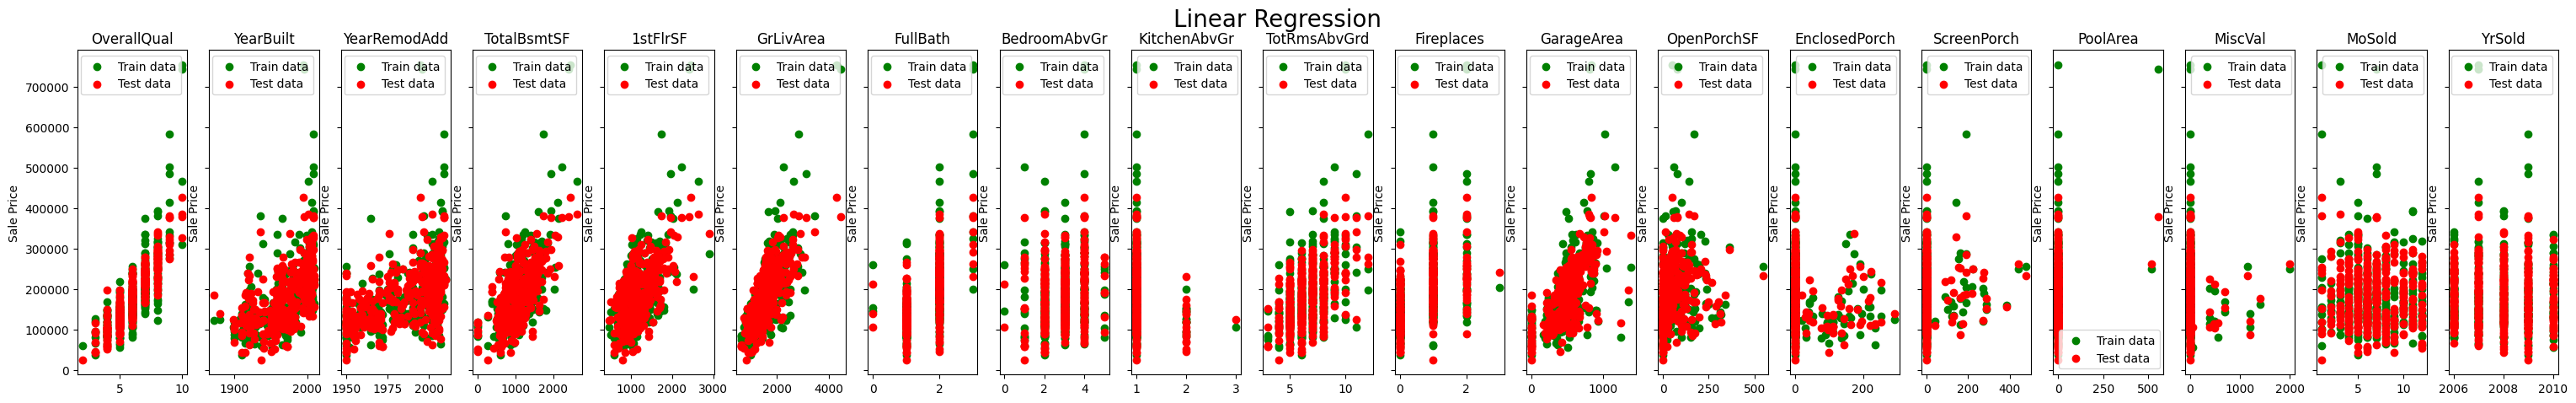

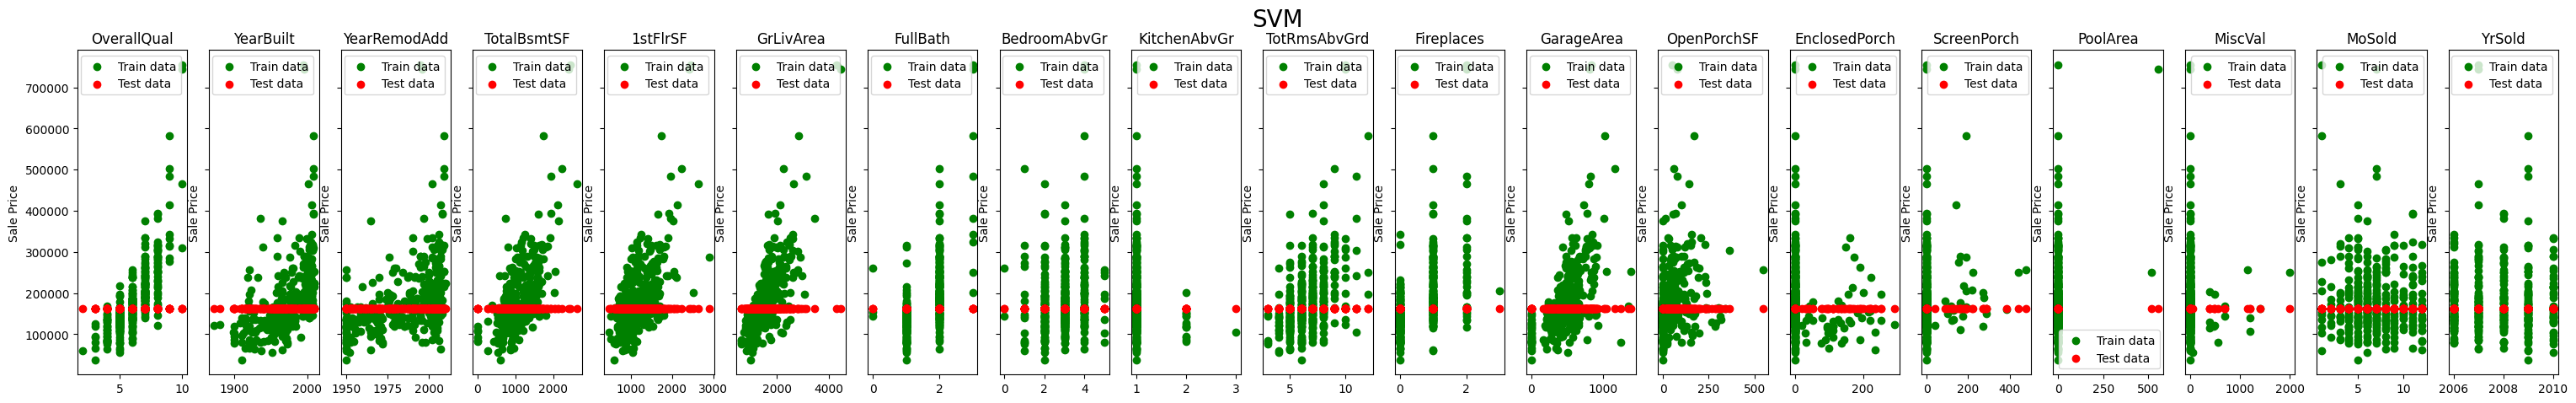

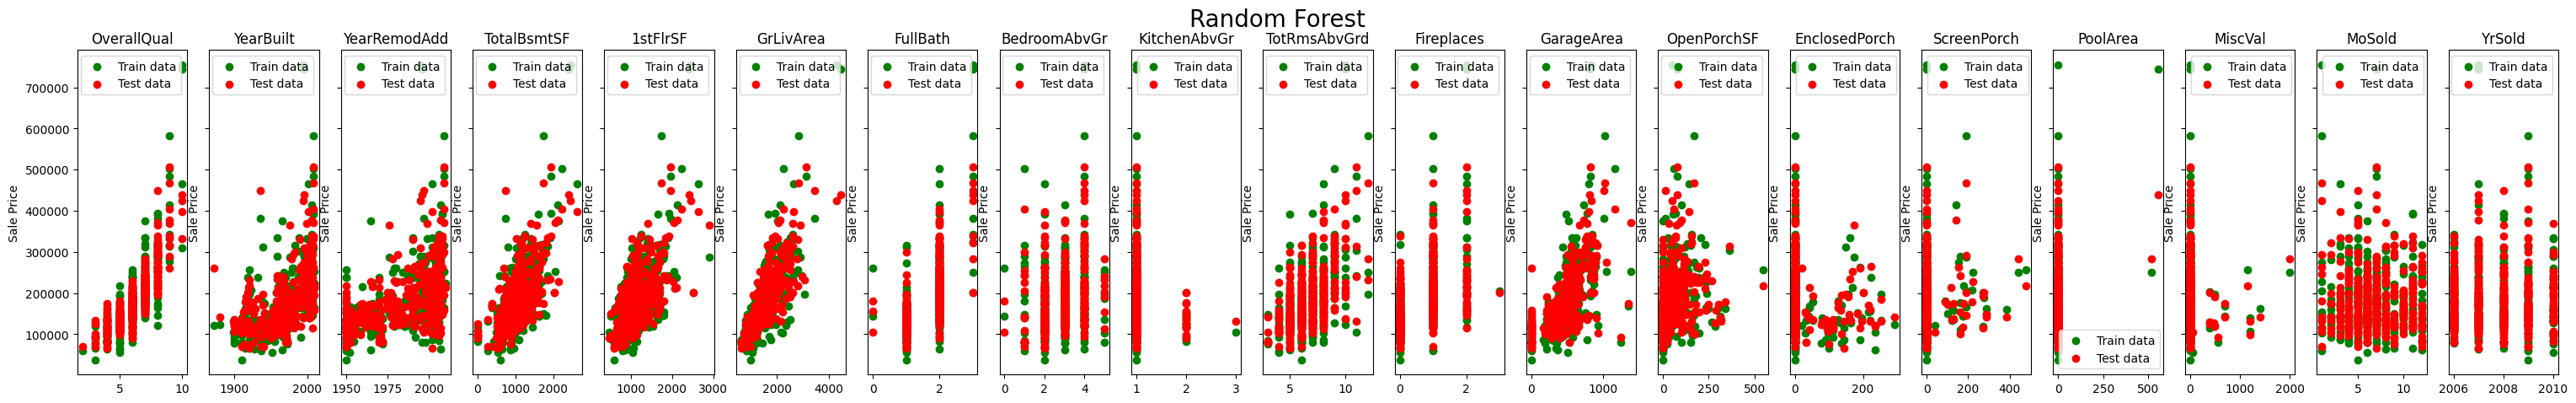

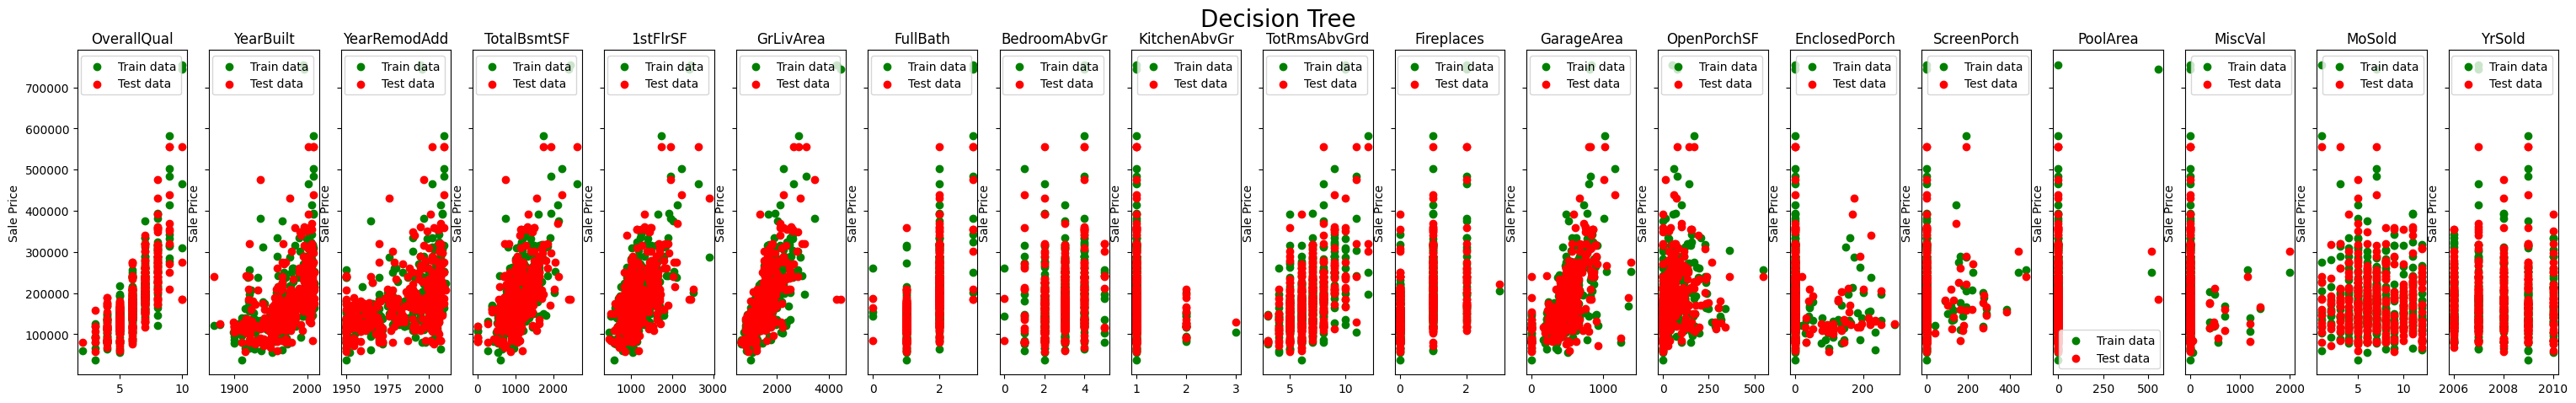

In [ ]:
# Display the scatter plot
# using a function
def regression_models(X1_train, X1_test, y1_train, y1_test, feature_list):
    method_list = ['Linear Regression', 'SVM', 'Random Forest', 'Decision Tree']
    lr = LinearRegression().fit(X1_train, y1_train).predict(X1_test),
    svr = SVR().fit(X1_train, y1_train).predict(X1_test),
    rf = RandomForestRegressor().fit(X1_train, y1_train).predict(X1_test),
    dt = DecisionTreeRegressor().fit(X1_train, y1_train).predict(X1_test)
    ypreds = [lr, svr, rf, dt]
    for method, y_pred in zip(method_list, ypreds):
        fig, ax = plt.subplots(1, len(feature_list), figsize=(2*len(feature_list), 5), sharey=True)
        fig.suptitle(method, size=20)
        for i in range(len(feature_list)):
            ax[i].scatter(X1_test.iloc[:,i], y1_test, c="green", label="Train data")
            ax[i].scatter(X1_test.iloc[:,i], y_pred, c='red', label='Test data')
            ax[i].set_title(feature_list[i])
            ax[i].set_ylabel('Sale Price')
            ax[i].legend()
        plt.show()

feature_list = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
regression_models(X1_train, X1_test, y1_train, y1_test, feature_list)